In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
%matplotlib inline

In [2]:
#Example taken from  Python for Finance 2d edition, author: Yves Hilpish
raw = pd.read_csv('data/AAPL.csv',index_col=0,parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-10-10 to 2021-10-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


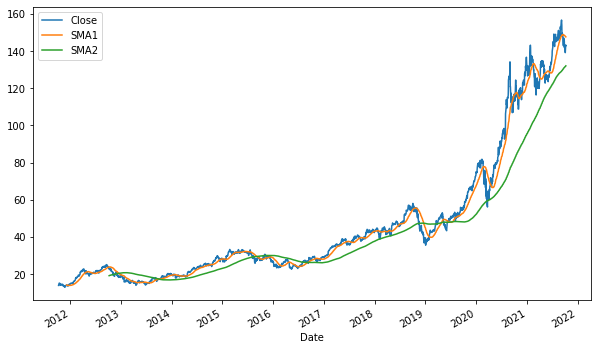

In [3]:
data = (pd.DataFrame(raw['Close']).dropna())
#Calculate the values for the short Simple Moving Average (SMA1) for 42 days and the long SMS for 252 days
SMA1 = 42
SMA2 = 252
data['SMA1'] = data['Close'].rolling(SMA1).mean()
data['SMA2'] = data['Close'].rolling(SMA2).mean()
data.plot(figsize=(10,6))



In [4]:
#Trading rule is to buy (+1) when SMA1>SMA2 (the shorter SMA is above the longer SMA) 
# and sell (-1) when the shorter SMA is below the longer SMA
#Use numpy where condition to evaluate the condition element wise
data['Position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
data.tail()

,Close,SMA1,SMA2,Position
Date,,,,
2021-10-04,139.139999,148.007143,131.606865,1
2021-10-05,141.110001,147.865476,131.704524,1
2021-10-06,142.000000,147.766905,131.818968,1
2021-10-07,143.289993,147.700238,131.930913,1
2021-10-08,142.899994,147.635952,132.041746,1


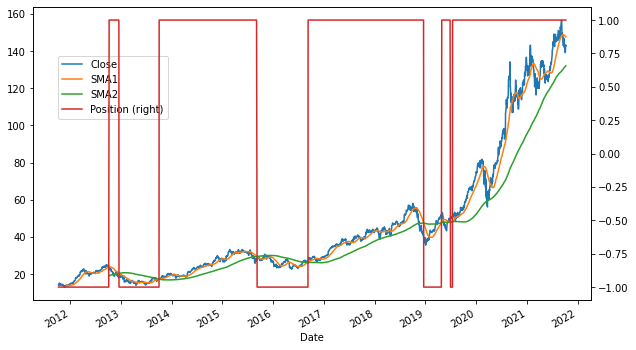

In [5]:
ax = data.plot(secondary_y='Position',figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

# Vectorized Backtesting
First calculate log returns and then multiply with the position represent by +1 or -1. 
Then sum all of the returns based on SMA strategy and a simple buy and hold strategy to compare both. Shift position values by one to avoid 
foresight bias. 

In [6]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data['Strategy'] = data['Position'].shift(1)*data['Returns']
data.dropna(inplace=True)
data.round(4).head()
np.exp(data[['Returns','Strategy']].sum())

Returns     6.131261
Strategy    5.292939
dtype: float64

**Note**: The SMA cross-over strategy seemed to be profitable from 2013 until late 2019 but then started underperforming
the simple buy and hold strategy. In this example we did not calculation in transaction costs (and for Belgium also a lot 
of taxes). You can try to start playing around with the number of days for calculating your SMA but this risks overfitting. 
Trading strategy which work for one asset, don't necessarily work for other.

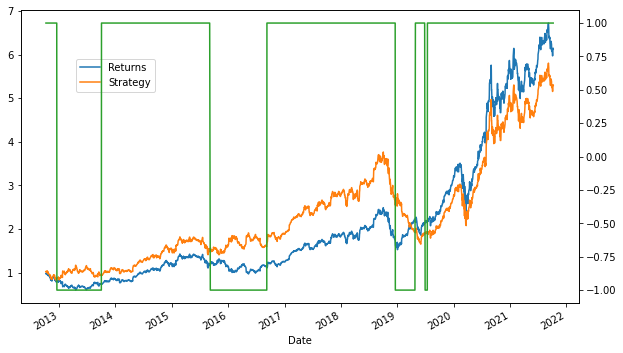

In [7]:
ax = data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['Position'].plot(ax=ax,secondary_y='Position', style='-')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))